# ANALYSE DES VENTES D'UNE LIBRAIRIE EN LIGNE

## Sommaire du notebook

**1. Import et nottoyage des données**

**2. Analyse des ventes produits**

**3. Analyse des profils clients**

**4. Etude des corrélations clients/produits**

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# 1ère partie : Nettoyage des données

In [3]:
# Import des données products

products = pd.read_csv('products.csv')
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [4]:
# Vérification des données nulles et des types

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [5]:
# Vérification de l'unicité des données d'identifiant

products.nunique()

id_prod    3287
price      1455
categ         3
dtype: int64

In [6]:
# Mise en relief des valeurs de la variable 'categ'

products['categ'].unique()

array([0, 1, 2], dtype=int64)

In [7]:
# Aperçu général des données du fichiers products

products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [8]:
# Vérification de potentiels valeurs abérrantes dans les prix

products.sort_values('price', ascending = True).head(15)

,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
1530,0_1620,0.80,0
2302,0_1364,0.81,0
2425,0_612,0.88,0
2772,0_902,0.92,0
686,0_2138,0.93,0


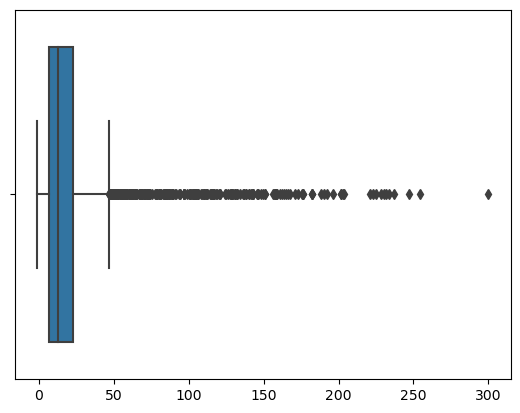

In [9]:
# Check des potentiels outliers à l'aide d'une boîte à moustache

prix = np.array(products['price'])
sns.boxplot(x = prix)
plt.show()

In [10]:
# Calcul du nombre potentiels d'outliers

Q1 = np.percentile(prix, 25)
Q3 = np.percentile(prix, 75)
IQ = Q3-Q1
outliers_IQ = products.loc[(products['price'] < (Q1 - 1.5*IQ)) | (products['price'] > (Q3 + 1.5*IQ)), 'price']
outliers_IQ.shape

(302,)

Conclusion de l'analyse : L'id_prod T_0 avec un prix négatif nécessite d'approfondir notre étude. Le reste des données apparaît cohérent.

In [11]:
# Import des données de transactions

transactions = pd.read_csv('transactions.csv')
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [12]:
# Vérification des valeurs nulles et des types

transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [13]:
# Aperçu des données

transactions.nunique()

id_prod         3267
date          679371
session_id    342316
client_id       8602
dtype: int64

In [14]:
# Exploration de l'id_prod T_0

test_transac = transactions.loc[transactions['id_prod'] == 'T_0']
test_transac

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [15]:
# Recherche des valeurs des client_id concernés

test_transac['client_id'].unique()

array(['ct_0', 'ct_1'], dtype=object)

In [16]:
# Etude du client ct_1

test_ct1 = transactions.loc[(transactions['client_id'] == 'ct_1')]
test_ct1

,id_prod,date,session_id,client_id
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
23678,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_1
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
35433,T_0,test_2021-03-01 02:30:02.237418,s_0,ct_1
38646,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_1
...,...,...,...,...
648864,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [17]:
test_ct1['date'].unique()

array(['test_2021-03-01 02:30:02.237437',
       'test_2021-03-01 02:30:02.237430',
       'test_2021-03-01 02:30:02.237418',
       'test_2021-03-01 02:30:02.237445',
       'test_2021-03-01 02:30:02.237434',
       'test_2021-03-01 02:30:02.237441',
       'test_2021-03-01 02:30:02.237440',
       'test_2021-03-01 02:30:02.237438',
       'test_2021-03-01 02:30:02.237427',
       'test_2021-03-01 02:30:02.237413',
       'test_2021-03-01 02:30:02.237412',
       'test_2021-03-01 02:30:02.237444',
       'test_2021-03-01 02:30:02.237415',
       'test_2021-03-01 02:30:02.237443',
       'test_2021-03-01 02:30:02.237425',
       'test_2021-03-01 02:30:02.237432',
       'test_2021-03-01 02:30:02.237446',
       'test_2021-03-01 02:30:02.237420',
       'test_2021-03-01 02:30:02.237419',
       'test_2021-03-01 02:30:02.237417',
       'test_2021-03-01 02:30:02.237414',
       'test_2021-03-01 02:30:02.237426',
       'test_2021-03-01 02:30:02.237424',
       'test_2021-03-01 02:30:02.2

Il s'agit de tests, les achats ont tous été effectués au même moment à la milliseconde près. Nous pouvons supprimer ces transactions de nos données.

In [18]:
# Exploration du client ct_1

test_ct0 = transactions.loc[(transactions['client_id'] == 'ct_0')]
test_ct0

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
...,...,...,...,...
633911,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
634523,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_0
635105,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_0
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0


In [19]:
test_ct0['date'].unique()

array(['test_2021-03-01 02:30:02.237419',
       'test_2021-03-01 02:30:02.237425',
       'test_2021-03-01 02:30:02.237436',
       'test_2021-03-01 02:30:02.237430',
       'test_2021-03-01 02:30:02.237449',
       'test_2021-03-01 02:30:02.237444',
       'test_2021-03-01 02:30:02.237426',
       'test_2021-03-01 02:30:02.237427',
       'test_2021-03-01 02:30:02.237432',
       'test_2021-03-01 02:30:02.237420',
       'test_2021-03-01 02:30:02.237431',
       'test_2021-03-01 02:30:02.237413',
       'test_2021-03-01 02:30:02.237446',
       'test_2021-03-01 02:30:02.237428',
       'test_2021-03-01 02:30:02.237435',
       'test_2021-03-01 02:30:02.237429',
       'test_2021-03-01 02:30:02.237416',
       'test_2021-03-01 02:30:02.237442',
       'test_2021-03-01 02:30:02.237414',
       'test_2021-03-01 02:30:02.237445',
       'test_2021-03-01 02:30:02.237418',
       'test_2021-03-01 02:30:02.237450',
       'test_2021-03-01 02:30:02.237438',
       'test_2021-03-01 02:30:02.2

Conclusion similaire, nous pouvons supprimer ces données.

In [20]:
# Suppression des transactions pour le client factice T_0

transactions = transactions.loc[transactions['id_prod'] != 'T_0']
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [21]:
# Nous pouvons dès lors supprimer le client T_0 dans notre tableau products

products = products.loc[products['id_prod'] != 'T_0']
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [22]:
# Modification du type de la colonne date en datetime

transactions.loc[:,'date'] = pd.to_datetime(transactions.loc[:, 'date'])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


C:\Users\sebhe\AppData\Local\Temp\ipykernel_19204\603065165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions.loc[:,'date'] = pd.to_datetime(transactions.loc[:, 'date'])
C:\Users\sebhe\AppData\Local\Temp\ipykernel_19204\603065165.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  transactions.loc[:,'date'] = pd.to_datetime(transactions.loc[:, 'date'])


In [23]:
# Détection de doublons sur les transactions

transactions.loc[transactions[['id_prod', 'date', 'session_id', 'client_id']].duplicated(keep=False),:]

,id_prod,date,session_id,client_id


In [24]:
# Ajout des colonnes année, mois, jour, heure, jour de la semaine et type de jour (semaine ou weekend)

transactions.loc[:, 'année'] = transactions.loc[:, 'date'].dt.year
transactions.loc[:, 'mois'] = transactions.loc[:,'date'].dt.month
transactions.loc[:, 'jour'] = transactions.loc[:, 'date'].dt.day
transactions.loc[:, 'heure'] = transactions.loc[:,'date'].dt.hour
transactions['jour_semaine'] = transactions['date'].dt.strftime('%A')
transactions['type_jour'] = transactions.apply(lambda x: 'Semaine'if x['jour_semaine'] in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] 
                                else 'Weekend', 
                                axis=1)
transactions['date'] = transactions['date'].dt.strftime("%Y-%m-%d")

transactions

C:\Users\sebhe\AppData\Local\Temp\ipykernel_19204\269918141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions.loc[:, 'année'] = transactions.loc[:, 'date'].dt.year
C:\Users\sebhe\AppData\Local\Temp\ipykernel_19204\269918141.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions.loc[:, 'mois'] = transactions.loc[:,'date'].dt.month
C:\Users\sebhe\AppData\Local\Temp\ipykernel_19204\269918141.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,id_prod,date,session_id,client_id,année,mois,jour,heure,jour_semaine,type_jour
0,0_1518,2022-05-20,s_211425,c_103,2022,5,20,13,Friday,Semaine
1,1_251,2022-02-02,s_158752,c_8534,2022,2,2,7,Wednesday,Semaine
2,0_1277,2022-06-18,s_225667,c_6714,2022,6,18,15,Saturday,Weekend
3,2_209,2021-06-24,s_52962,c_6941,2021,6,24,4,Thursday,Semaine
4,0_1509,2023-01-11,s_325227,c_4232,2023,1,11,8,Wednesday,Semaine
...,...,...,...,...,...,...,...,...,...,...
679527,0_1551,2022-01-15,s_150195,c_8489,2022,1,15,13,Saturday,Weekend
679528,1_639,2022-03-19,s_181434,c_4370,2022,3,19,16,Saturday,Weekend
679529,0_1425,2022-12-20,s_314704,c_304,2022,12,20,4,Tuesday,Semaine
679530,0_1994,2021-07-16,s_63204,c_2227,2021,7,16,20,Friday,Semaine


# Fusion des tables transactions et products

In [25]:
transacXprod = pd.merge(transactions, products, on = 'id_prod', how = 'outer', indicator = True)
transacXprod['_merge'].value_counts()

both          679111
left_only        221
right_only        21
Name: _merge, dtype: int64

In [26]:
transacXprod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679353 entries, 0 to 679352
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id_prod       679353 non-null  object  
 1   date          679332 non-null  object  
 2   session_id    679332 non-null  object  
 3   client_id     679332 non-null  object  
 4   année         679332 non-null  float64 
 5   mois          679332 non-null  float64 
 6   jour          679332 non-null  float64 
 7   heure         679332 non-null  float64 
 8   jour_semaine  679332 non-null  object  
 9   type_jour     679332 non-null  object  
 10  price         679132 non-null  float64 
 11  categ         679132 non-null  float64 
 12  _merge        679353 non-null  category
dtypes: category(1), float64(6), object(6)
memory usage: 68.0+ MB


# Produits n'ayant pas été vendus

In [27]:
prod_non_vendus = transacXprod.loc[transacXprod['_merge'] == 'right_only']
prod_non_vendus

,id_prod,date,session_id,client_id,année,mois,jour,heure,jour_semaine,type_jour,price,categ,_merge
679332,0_1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.06,0.0,right_only
679333,0_1780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.67,0.0,right_only
679334,0_1062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.08,0.0,right_only
679335,0_1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.99,0.0,right_only
679336,0_1014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.15,0.0,right_only
679337,1_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.82,1.0,right_only
679338,0_1318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.92,0.0,right_only
679339,0_1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.05,0.0,right_only
679340,0_1645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.99,0.0,right_only
679341,0_322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.99,0.0,right_only


In [28]:
# Suppression des produits qui n'ont pas été vendus

transacXprod = transacXprod.loc[transacXprod['_merge'] != 'right_only']


In [29]:
# Affichage des produits pour lesquels nous n'avons pas d'information sur le prix et la catégorie

merge_left = transacXprod.loc[transacXprod['_merge'] == 'left_only']
merge_left

,id_prod,date,session_id,client_id,année,mois,jour,heure,jour_semaine,type_jour,price,categ,_merge
542560,0_2245,2022-09-23,s_272266,c_4746,2022.0,9.0,23.0,7.0,Friday,Semaine,NaN,NaN,left_only
542561,0_2245,2022-07-23,s_242482,c_6713,2022.0,7.0,23.0,9.0,Saturday,Weekend,NaN,NaN,left_only
542562,0_2245,2022-12-03,s_306338,c_5108,2022.0,12.0,3.0,3.0,Saturday,Weekend,NaN,NaN,left_only
542563,0_2245,2021-08-16,s_76493,c_1391,2021.0,8.0,16.0,11.0,Monday,Semaine,NaN,NaN,left_only
542564,0_2245,2022-07-16,s_239078,c_7954,2022.0,7.0,16.0,5.0,Saturday,Weekend,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25,s_80395,c_131,2021.0,8.0,25.0,9.0,Wednesday,Semaine,NaN,NaN,left_only
542777,0_2245,2022-03-06,s_175311,c_4167,2022.0,3.0,6.0,19.0,Sunday,Weekend,NaN,NaN,left_only
542778,0_2245,2022-05-16,s_209381,c_4453,2022.0,5.0,16.0,11.0,Monday,Semaine,NaN,NaN,left_only
542779,0_2245,2022-02-11,s_163405,c_1098,2022.0,2.0,11.0,9.0,Friday,Semaine,NaN,NaN,left_only


In [30]:
# Vérification des différents id_prod concernés

merge_left['id_prod'].unique()

array(['0_2245'], dtype=object)

In [31]:
transacXprod['price'].mean()

17.45477349063702

In [32]:
transacXprod

,id_prod,date,session_id,client_id,année,mois,jour,heure,jour_semaine,type_jour,price,categ,_merge
0,0_1518,2022-05-20,s_211425,c_103,2022.0,5.0,20.0,13.0,Friday,Semaine,4.18,0.0,both
1,0_1518,2021-09-26,s_95811,c_6197,2021.0,9.0,26.0,12.0,Sunday,Weekend,4.18,0.0,both
2,0_1518,2021-05-06,s_30782,c_682,2021.0,5.0,6.0,17.0,Thursday,Semaine,4.18,0.0,both
3,0_1518,2022-03-16,s_180057,c_5932,2022.0,3.0,16.0,18.0,Wednesday,Semaine,4.18,0.0,both
4,0_1518,2022-11-12,s_296584,c_7217,2022.0,11.0,12.0,18.0,Saturday,Weekend,4.18,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1279,2021-06-23,s_52563,c_1025,2021.0,6.0,23.0,6.0,Wednesday,Semaine,20.99,0.0,both
679328,0_1683,2021-12-24,s_139091,c_5508,2021.0,12.0,24.0,4.0,Friday,Semaine,2.99,0.0,both
679329,0_1379,2021-10-16,s_105547,c_5425,2021.0,10.0,16.0,9.0,Saturday,Weekend,2.99,0.0,both
679330,0_886,2021-03-17,s_7410,c_7219,2021.0,3.0,17.0,3.0,Wednesday,Semaine,21.82,0.0,both


In [33]:
# Imputation des données de prix manquantes grâce à la méthode des k-nearest-neighbors

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7, metric='nan_euclidean', weights='uniform')
imputed_data = imputer.fit_transform(transacXprod['price'].values.reshape(-1,1))
imputed_data = np.round(imputed_data, 2)
transacXprod['price'] = imputed_data
transacXprod

,id_prod,date,session_id,client_id,année,mois,jour,heure,jour_semaine,type_jour,price,categ,_merge
0,0_1518,2022-05-20,s_211425,c_103,2022.0,5.0,20.0,13.0,Friday,Semaine,4.18,0.0,both
1,0_1518,2021-09-26,s_95811,c_6197,2021.0,9.0,26.0,12.0,Sunday,Weekend,4.18,0.0,both
2,0_1518,2021-05-06,s_30782,c_682,2021.0,5.0,6.0,17.0,Thursday,Semaine,4.18,0.0,both
3,0_1518,2022-03-16,s_180057,c_5932,2022.0,3.0,16.0,18.0,Wednesday,Semaine,4.18,0.0,both
4,0_1518,2022-11-12,s_296584,c_7217,2022.0,11.0,12.0,18.0,Saturday,Weekend,4.18,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1279,2021-06-23,s_52563,c_1025,2021.0,6.0,23.0,6.0,Wednesday,Semaine,20.99,0.0,both
679328,0_1683,2021-12-24,s_139091,c_5508,2021.0,12.0,24.0,4.0,Friday,Semaine,2.99,0.0,both
679329,0_1379,2021-10-16,s_105547,c_5425,2021.0,10.0,16.0,9.0,Saturday,Weekend,2.99,0.0,both
679330,0_886,2021-03-17,s_7410,c_7219,2021.0,3.0,17.0,3.0,Wednesday,Semaine,21.82,0.0,both


In [34]:
# Vérification du prix calculé pour l'id_prod 0_2245

transacXprod.loc[transacXprod['id_prod'] == '0_2245']


,id_prod,date,session_id,client_id,année,mois,jour,heure,jour_semaine,type_jour,price,categ,_merge
542560,0_2245,2022-09-23,s_272266,c_4746,2022.0,9.0,23.0,7.0,Friday,Semaine,17.45,NaN,left_only
542561,0_2245,2022-07-23,s_242482,c_6713,2022.0,7.0,23.0,9.0,Saturday,Weekend,17.45,NaN,left_only
542562,0_2245,2022-12-03,s_306338,c_5108,2022.0,12.0,3.0,3.0,Saturday,Weekend,17.45,NaN,left_only
542563,0_2245,2021-08-16,s_76493,c_1391,2021.0,8.0,16.0,11.0,Monday,Semaine,17.45,NaN,left_only
542564,0_2245,2022-07-16,s_239078,c_7954,2022.0,7.0,16.0,5.0,Saturday,Weekend,17.45,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25,s_80395,c_131,2021.0,8.0,25.0,9.0,Wednesday,Semaine,17.45,NaN,left_only
542777,0_2245,2022-03-06,s_175311,c_4167,2022.0,3.0,6.0,19.0,Sunday,Weekend,17.45,NaN,left_only
542778,0_2245,2022-05-16,s_209381,c_4453,2022.0,5.0,16.0,11.0,Monday,Semaine,17.45,NaN,left_only
542779,0_2245,2022-02-11,s_163405,c_1098,2022.0,2.0,11.0,9.0,Friday,Semaine,17.45,NaN,left_only


In [35]:
# Imputation des données de catégories manquantes en choisissant la catégorie la plus représentée

transacXprod['categ'].value_counts()

0.0    415459
1.0    227169
2.0     36483
Name: categ, dtype: int64

In [36]:
# Imputation de la valeur 0

transacXprod.loc[transacXprod['id_prod'] == '0_2245', 'categ'] =  0
transacXprod.isnull().sum()

id_prod         0
date            0
session_id      0
client_id       0
année           0
mois            0
jour            0
heure           0
jour_semaine    0
type_jour       0
price           0
categ           0
_merge          0
dtype: int64

In [37]:
# Vérification des lignes pour l'id_prod 0_2245

transacXprod.loc[transacXprod['id_prod'] == '0_2245']

,id_prod,date,session_id,client_id,année,mois,jour,heure,jour_semaine,type_jour,price,categ,_merge
542560,0_2245,2022-09-23,s_272266,c_4746,2022.0,9.0,23.0,7.0,Friday,Semaine,17.45,0.0,left_only
542561,0_2245,2022-07-23,s_242482,c_6713,2022.0,7.0,23.0,9.0,Saturday,Weekend,17.45,0.0,left_only
542562,0_2245,2022-12-03,s_306338,c_5108,2022.0,12.0,3.0,3.0,Saturday,Weekend,17.45,0.0,left_only
542563,0_2245,2021-08-16,s_76493,c_1391,2021.0,8.0,16.0,11.0,Monday,Semaine,17.45,0.0,left_only
542564,0_2245,2022-07-16,s_239078,c_7954,2022.0,7.0,16.0,5.0,Saturday,Weekend,17.45,0.0,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25,s_80395,c_131,2021.0,8.0,25.0,9.0,Wednesday,Semaine,17.45,0.0,left_only
542777,0_2245,2022-03-06,s_175311,c_4167,2022.0,3.0,6.0,19.0,Sunday,Weekend,17.45,0.0,left_only
542778,0_2245,2022-05-16,s_209381,c_4453,2022.0,5.0,16.0,11.0,Monday,Semaine,17.45,0.0,left_only
542779,0_2245,2022-02-11,s_163405,c_1098,2022.0,2.0,11.0,9.0,Friday,Semaine,17.45,0.0,left_only


In [38]:
# Suppression de la colonne _merge

transacXprod = transacXprod.drop(columns = '_merge')
transacXprod

,id_prod,date,session_id,client_id,année,mois,jour,heure,jour_semaine,type_jour,price,categ
0,0_1518,2022-05-20,s_211425,c_103,2022.0,5.0,20.0,13.0,Friday,Semaine,4.18,0.0
1,0_1518,2021-09-26,s_95811,c_6197,2021.0,9.0,26.0,12.0,Sunday,Weekend,4.18,0.0
2,0_1518,2021-05-06,s_30782,c_682,2021.0,5.0,6.0,17.0,Thursday,Semaine,4.18,0.0
3,0_1518,2022-03-16,s_180057,c_5932,2022.0,3.0,16.0,18.0,Wednesday,Semaine,4.18,0.0
4,0_1518,2022-11-12,s_296584,c_7217,2022.0,11.0,12.0,18.0,Saturday,Weekend,4.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1279,2021-06-23,s_52563,c_1025,2021.0,6.0,23.0,6.0,Wednesday,Semaine,20.99,0.0
679328,0_1683,2021-12-24,s_139091,c_5508,2021.0,12.0,24.0,4.0,Friday,Semaine,2.99,0.0
679329,0_1379,2021-10-16,s_105547,c_5425,2021.0,10.0,16.0,9.0,Saturday,Weekend,2.99,0.0
679330,0_886,2021-03-17,s_7410,c_7219,2021.0,3.0,17.0,3.0,Wednesday,Semaine,21.82,0.0


In [39]:
# Modification du type de plusieurs colonnes

var_modif = ['année', 'mois', 'jour', 'heure', 'categ']

for var in var_modif :
    transacXprod [var]= transacXprod[var].astype('int64')
    
transacXprod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id_prod       679332 non-null  object 
 1   date          679332 non-null  object 
 2   session_id    679332 non-null  object 
 3   client_id     679332 non-null  object 
 4   année         679332 non-null  int64  
 5   mois          679332 non-null  int64  
 6   jour          679332 non-null  int64  
 7   heure         679332 non-null  int64  
 8   jour_semaine  679332 non-null  object 
 9   type_jour     679332 non-null  object 
 10  price         679332 non-null  float64
 11  categ         679332 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 67.4+ MB


In [40]:
# Import des données customers

customers = pd.read_csv('customers.csv')
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [41]:
# Vérification des types et des valeurs nulles

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [42]:
# Vérification de l'unicité des identifiants

customers.nunique()

client_id    8623
sex             2
birth          76
dtype: int64

In [43]:
# Détection de potentiels outliers parmi les dates de naissances des clients

customers.sort_values('birth', ascending = False)

,client_id,sex,birth
1920,c_3923,f,2004
1090,c_962,m,2004
8209,c_5316,f,2004
889,c_3185,m,2004
891,c_184,m,2004
...,...,...,...
7550,c_353,m,1930
3994,c_4679,f,1930
4569,c_577,m,1929
2491,c_8362,f,1929


In [44]:
# Ajout d'une colonne pour l'âge

customers['age'] = 2022 - customers['birth']
customers.sort_values('age', ascending = False)

,client_id,sex,birth,age
4569,c_577,m,1929,93
418,c_5302,m,1929,93
2491,c_8362,f,1929,93
7550,c_353,m,1930,92
5138,c_7232,f,1930,92
...,...,...,...,...
7789,c_3938,f,2004,18
6891,c_535,f,2004,18
2184,c_5084,m,2004,18
5433,c_5436,f,2004,18


In [45]:
# Ajout d'une colonne pour les tranches d'âges 

conditions = [(customers['age'] <= 25),
              (customers['age'] > 25) & (customers['age'] <= 40),
              (customers['age'] > 40) & (customers['age'] <= 55),
              (customers['age'] > 55) & (customers['age'] <= 70),
              (customers['age'] > 70)
             ]

valeurs = ['18-25', '26-40', '41-55', '55-70', '70+']             

customers["tranche d'age"] = np.select(conditions, valeurs)
customers

,client_id,sex,birth,age,tranche d'age
0,c_4410,f,1967,55,41-55
1,c_7839,f,1975,47,41-55
2,c_1699,f,1984,38,26-40
3,c_5961,f,1962,60,55-70
4,c_5320,m,1943,79,70+
...,...,...,...,...,...
8618,c_7920,m,1956,66,55-70
8619,c_7403,f,1970,52,41-55
8620,c_5119,m,1974,48,41-55
8621,c_5643,f,1968,54,41-55


In [46]:
customers["tranche d'age"].value_counts()

41-55    2509
26-40    2485
55-70    1604
18-25    1447
70+       578
Name: tranche d'age, dtype: int64

# Fusion des tables transacXprod et customers

In [47]:
data = pd.merge(transacXprod, customers, on = 'client_id', how = 'outer', indicator = True)
data

,id_prod,date,session_id,client_id,année,mois,jour,heure,jour_semaine,type_jour,price,categ,sex,birth,age,tranche d'age,_merge
0,0_1518,2022-05-20,s_211425,c_103,2022.0,5.0,20.0,13.0,Friday,Semaine,4.18,0.0,f,1986,36,26-40,both
1,0_1518,2021-07-20,s_64849,c_103,2021.0,7.0,20.0,13.0,Tuesday,Semaine,4.18,0.0,f,1986,36,26-40,both
2,0_1518,2022-08-20,s_255965,c_103,2022.0,8.0,20.0,13.0,Saturday,Weekend,4.18,0.0,f,1986,36,26-40,both
3,0_1418,2022-06-18,s_225411,c_103,2022.0,6.0,18.0,1.0,Saturday,Weekend,8.57,0.0,f,1986,36,26-40,both
4,0_1418,2021-08-18,s_77214,c_103,2021.0,8.0,18.0,1.0,Wednesday,Semaine,8.57,0.0,f,1986,36,26-40,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679350,NaN,NaN,NaN,c_7584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1960,62,55-70,right_only
679351,NaN,NaN,NaN,c_90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m,2001,21,18-25,right_only
679352,NaN,NaN,NaN,c_587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m,1993,29,26-40,right_only
679353,NaN,NaN,NaN,ct_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m,2001,21,18-25,right_only


In [48]:
data['_merge'].value_counts()

both          679332
right_only        23
left_only          0
Name: _merge, dtype: int64

# Clients n'ayant effectué aucun achats

In [49]:
clients_sans_achat = data.loc[data['_merge'] == 'right_only']
clients_sans_achat

,id_prod,date,session_id,client_id,année,mois,jour,heure,jour_semaine,type_jour,price,categ,sex,birth,age,tranche d'age,_merge
679332,NaN,NaN,NaN,c_8253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2001,21,18-25,right_only
679333,NaN,NaN,NaN,c_3789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1997,25,18-25,right_only
679334,NaN,NaN,NaN,c_4406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1998,24,18-25,right_only
679335,NaN,NaN,NaN,ct_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2001,21,18-25,right_only
679336,NaN,NaN,NaN,c_2706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1967,55,41-55,right_only
679337,NaN,NaN,NaN,c_3443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m,1959,63,55-70,right_only
679338,NaN,NaN,NaN,c_4447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m,1956,66,55-70,right_only
679339,NaN,NaN,NaN,c_3017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1992,30,26-40,right_only
679340,NaN,NaN,NaN,c_4086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1992,30,26-40,right_only
679341,NaN,NaN,NaN,c_6930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m,2004,18,18-25,right_only


# Tableau de données final

In [50]:
data = data.loc[data['_merge'] != 'right_only']
data = data.drop(columns = '_merge')

var_modif = ['année', 'mois', 'jour', 'heure', 'categ']

for var in var_modif :
    data [var]= data[var].astype('int64')
    
data

,id_prod,date,session_id,client_id,année,mois,jour,heure,jour_semaine,type_jour,price,categ,sex,birth,age,tranche d'age
0,0_1518,2022-05-20,s_211425,c_103,2022,5,20,13,Friday,Semaine,4.18,0,f,1986,36,26-40
1,0_1518,2021-07-20,s_64849,c_103,2021,7,20,13,Tuesday,Semaine,4.18,0,f,1986,36,26-40
2,0_1518,2022-08-20,s_255965,c_103,2022,8,20,13,Saturday,Weekend,4.18,0,f,1986,36,26-40
3,0_1418,2022-06-18,s_225411,c_103,2022,6,18,1,Saturday,Weekend,8.57,0,f,1986,36,26-40
4,0_1418,2021-08-18,s_77214,c_103,2021,8,18,1,Wednesday,Semaine,8.57,0,f,1986,36,26-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23,s_65994,c_4391,2021,7,23,7,Friday,Semaine,181.99,2,f,2001,21,18-25
679328,0_142,2022-03-25,s_184472,c_1232,2022,3,25,18,Friday,Semaine,19.85,0,f,1960,62,55-70
679329,0_142,2021-09-25,s_95415,c_1232,2021,9,25,18,Saturday,Weekend,19.85,0,f,1960,62,55-70
679330,2_205,2021-03-11,s_4605,c_7534,2021,3,11,0,Thursday,Semaine,100.99,2,m,1992,30,26-40


# 2ème partie : Analyse des ventes produits

In [187]:
# CA total

CA_total = round(data['price'].sum())

print("==> Le chiffre d'affaires total réalisé est de", round(CA_total/1000000, 2), "M€ entre mars 2021 et février 2023, soit 24 mois.")

==> Le chiffre d'affaires total réalisé est de 11.86 M€ entre mars 2021 et février 2023, soit 24 mois.


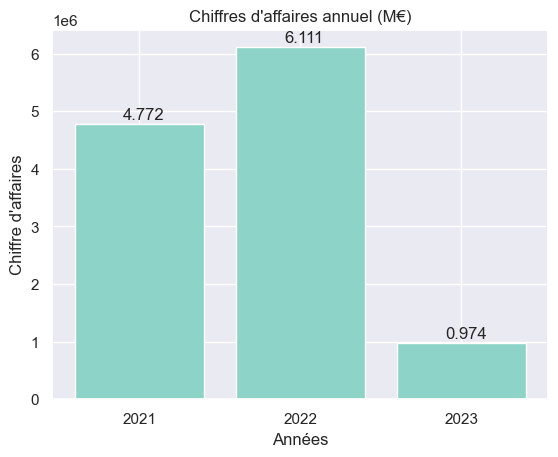

In [52]:
# CA annuel

CA_année = data.groupby('année')['price'].sum().reset_index()
CA_année['année'] = CA_année['année'].astype('object')

sns.set_theme()
sns.set_palette('Set3')

plt.bar(['2021', '2022', '2023'] , CA_année['price'])
plt.title("Chiffres d'affaires annuel (M€)")
plt.xlabel("Années")
plt.ylabel("Chiffre d'affaires")

ca = CA_année['price'].to_list()
for i in range(3):
    plt.text(i-0.1, ca[i] + 80000, round((ca[i]/1000000), 3))

plt.show()

In [53]:
# Regroupement des données de CA par années et par mois

CA_mois = data.groupby(['année', 'mois']) ['price'].sum()
CA_mois = CA_mois.reset_index()
CA_mois.sort_values(['année', 'mois'])
CA_mois = CA_mois.rename(columns = {'price' : 'CA_mensuel'})

# Modification du type

CA_mois['année'] = CA_mois['année'].astype('object')
CA_mois['mois'] = CA_mois['mois'].astype('object')

# Création d'une nouvelle colonne avec le format date MM-YYYY

CA_mois['date'] = CA_mois.apply(lambda x: "0{}-{}".format(x['mois'],x['année']) 
                    if x['mois'] < 10 else "{}-{}".format(x['mois'],x['année']), 
                    axis=1)

CA_mois.info()
CA_mois

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   année       24 non-null     object 
 1   mois        24 non-null     object 
 2   CA_mensuel  24 non-null     float64
 3   date        24 non-null     object 
dtypes: float64(1), object(3)
memory usage: 896.0+ bytes


,année,mois,CA_mensuel,date
0,2021,3,482597.66,03-2021
1,2021,4,476353.60,04-2021
2,2021,5,493083.07,05-2021
3,2021,6,484210.71,06-2021
4,2021,7,482905.20,07-2021
5,2021,8,482441.84,08-2021
6,2021,9,507450.08,09-2021
7,2021,10,320920.89,10-2021
8,2021,11,516342.23,11-2021
9,2021,12,526039.43,12-2021


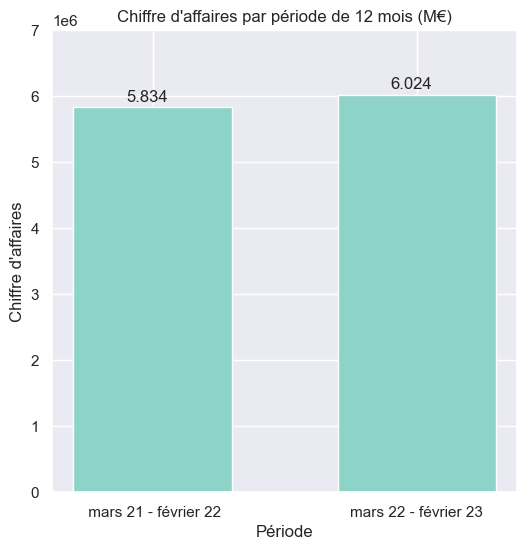

In [54]:
# Recherche du CA par période de 12 mois

liste1 = ['03-2021', '04-2021', '05-2021', '06-2021', '07-2021', '08-2021',
       '09-2021', '10-2021', '11-2021', '12-2021', '01-2022', '02-2022']

CA_annuel = pd.DataFrame()
for var in liste1 :
    CA_annuel.loc[var,'CA_mensuel'] = CA_mois.loc[CA_mois['date'] == var,'CA_mensuel'].sum()
    
CA_annuel = CA_annuel.rename(columns = {'CA_mensuel' : 'CA_2122'})

liste2 = ['03-2022', '04-2022', '05-2022', '06-2022', '07-2022', '08-2022',
       '09-2022', '10-2022', '11-2022', '12-2022', '01-2023', '02-2023']

for var in liste2 :
    CA_annuel.loc[var,'CA_mensuel'] = CA_mois.loc[CA_mois['date'] == var,'CA_mensuel'].sum()
    
CA_annuel = CA_annuel.rename(columns = {'CA_mensuel' : 'CA_2223'})

CA_2122 = CA_annuel['CA_2122'].sum()
CA_2223 = CA_annuel['CA_2223'].sum()

# Construction du barplot

plt.figure(figsize = (6, 6))
plt.bar([' mars 21 - février 22', 'mars 22 - février 23'], [CA_2122, CA_2223], width=0.6)
plt.title("Chiffre d'affaires par période de 12 mois (M€)")
plt.xlabel('Période')
plt.ylabel("Chiffre d'affaires")
plt.ylim(0, 7000000)

ca = [CA_2122, CA_2223]

for i in range(2) :
    plt.text(i -0.1, ca[i] + 80000, round(ca[i]/1000000, 3))

plt.show()

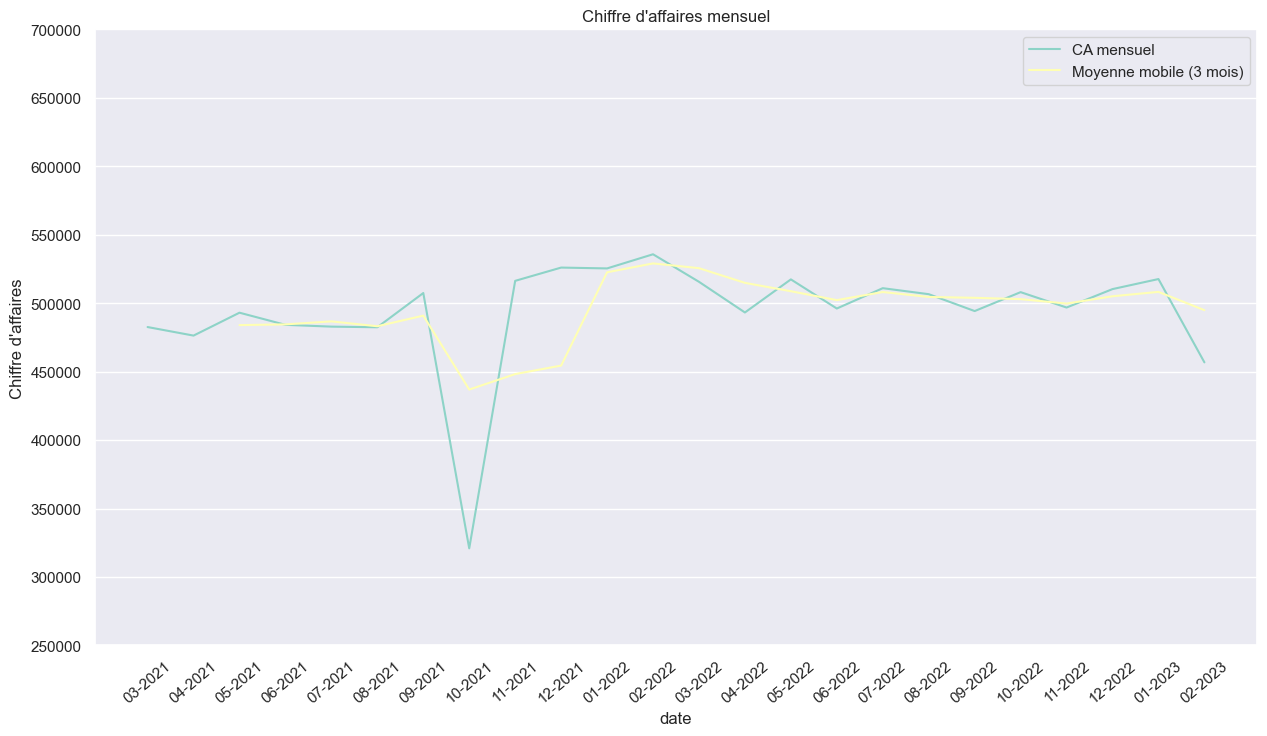

In [55]:
# Calcul de la moyenne mobile sur une fenêtre de 3 mois
CA_mois['moyenne_mobile'] = round(CA_mois["CA_mensuel"].rolling(window=3).mean())

# Graphique d'évolution mensuelle du CA

plt.figure(figsize=(15, 8))
plt.plot( CA_mois['date'], CA_mois["CA_mensuel"], label = 'CA mensuel')
plt.plot(CA_mois['date'], CA_mois["moyenne_mobile"], label = "Moyenne mobile (3 mois)")
plt.title("Chiffre d'affaires mensuel")
plt.xlabel('date')
plt.ylabel("Chiffre d'affaires")
plt.grid(axis = 'x')
plt.ylim(250000, 700000)
plt.xticks(rotation=40)
plt.legend()

plt.show()

In [56]:
# Exploration des données de CA du mois d'octobre 2021

x = CA_mois['CA_mensuel'][7]
y = CA_mois['CA_mensuel'].mean()
var_CA = round((y-x)*100 / y, 2)
var_CA2 = round((CA_mois['CA_mensuel'][6] - CA_mois['CA_mensuel'][7])*100/ CA_mois['CA_mensuel'][6], 2)
var_CA3 = round((CA_mois['CA_mensuel'][8] - CA_mois['CA_mensuel'][7])*100/ CA_mois['CA_mensuel'][8], 2)

print("Le chiffre d'affaires d'octobre 2021 est inférieur de", var_CA, "% par rapport à la moyenne mensuelle du chiffre d'affaires.")
print("Il est inférieur de", var_CA2, "% par rapport au mois précédent. Et", var_CA3, "% pa rapport au mois d'après")


Le chiffre d'affaires d'octobre 2021 est inférieur de 35.04 % par rapport à la moyenne mensuelle du chiffre d'affaires.
Il est inférieur de 36.76 % par rapport au mois précédent. Et 37.85 % pa rapport au mois d'après


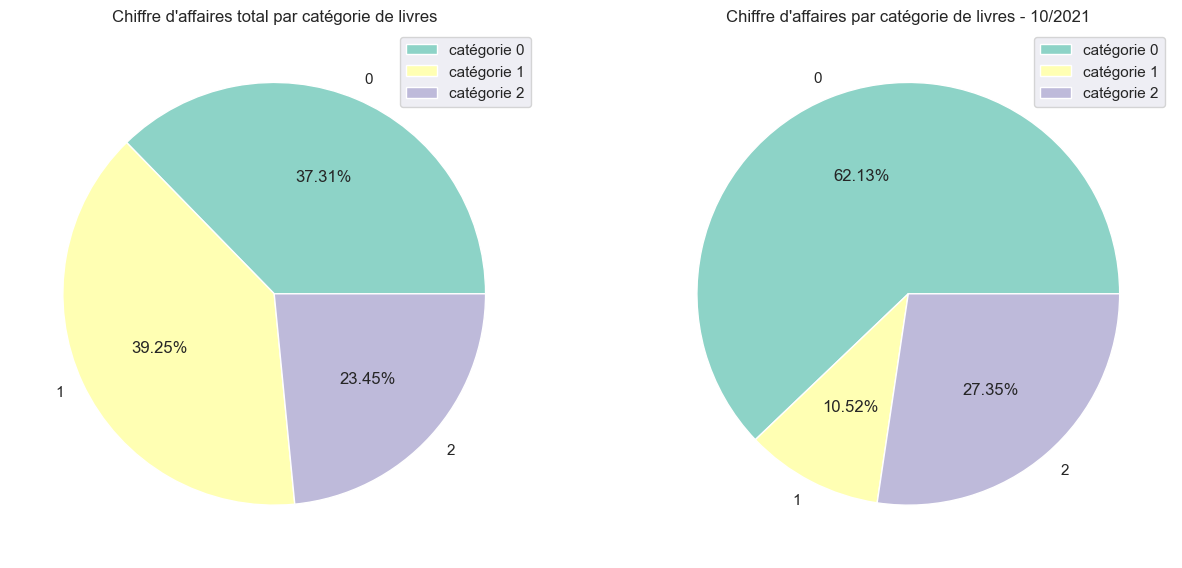

In [57]:
# Répartition du CA d'octobre 2021 par catégorie

CA_oct21 = data.loc[(data['année'] == 2021) & (data['mois'] == 10)]
categ_oct21 = CA_oct21.groupby('categ')['price'].sum()
categ_oct21 = categ_oct21.reset_index()

# CA total réparti réparti par catégories livres

CA_categ = data.groupby('categ')['price'].sum()
CA_categ = CA_categ.reset_index()

# Comparaison des répartitions de CA

sns.set_style("darkgrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax2.pie(x=categ_oct21['price'], labels=categ_oct21['categ'], autopct='%.2f%%')
ax2.set_title("Chiffre d'affaires par catégorie de livres - 10/2021")
ax2.legend(['catégorie 0', 'catégorie 1', 'catégorie 2'], loc = 'upper right')

ax1.pie(x=CA_categ['price'], labels=CA_categ['categ'], autopct='%.2f%%')
ax1.set_title("Chiffre d'affaires total par catégorie de livres")
ax1.legend(['catégorie 0', 'catégorie 1', 'catégorie 2'], loc = 'upper right')

plt.show()

In [58]:
# Comparaison du nombre de ventes en octobre 21 vs en moyenne

a = round(len(data.loc[data['categ'] == 0, 'price']) / len(CA_mois['mois']))
b = round(len(data.loc[data['categ'] == 1, 'price']) / len(CA_mois['mois']))
c = round(len(data.loc[data['categ'] == 2, 'price']) / len(CA_mois['mois']))

d =len(CA_oct21.loc[CA_oct21['categ'] == 0, 'price'])
e =len(CA_oct21.loc[CA_oct21['categ'] == 1, 'price'])
f =len(CA_oct21.loc[CA_oct21['categ'] == 2, 'price'])

categ = [0, 1, 2]
moyenne = [a, b, c]
oct21 = [d, e, f]

tab = {'categ' : categ, 'oct21' : oct21, 'moyenne' : moyenne}
tab = pd.DataFrame(tab)
tab

,categ,oct21,moyenne
0,0,18769,17320
1,1,1666,9465
2,2,1171,1520


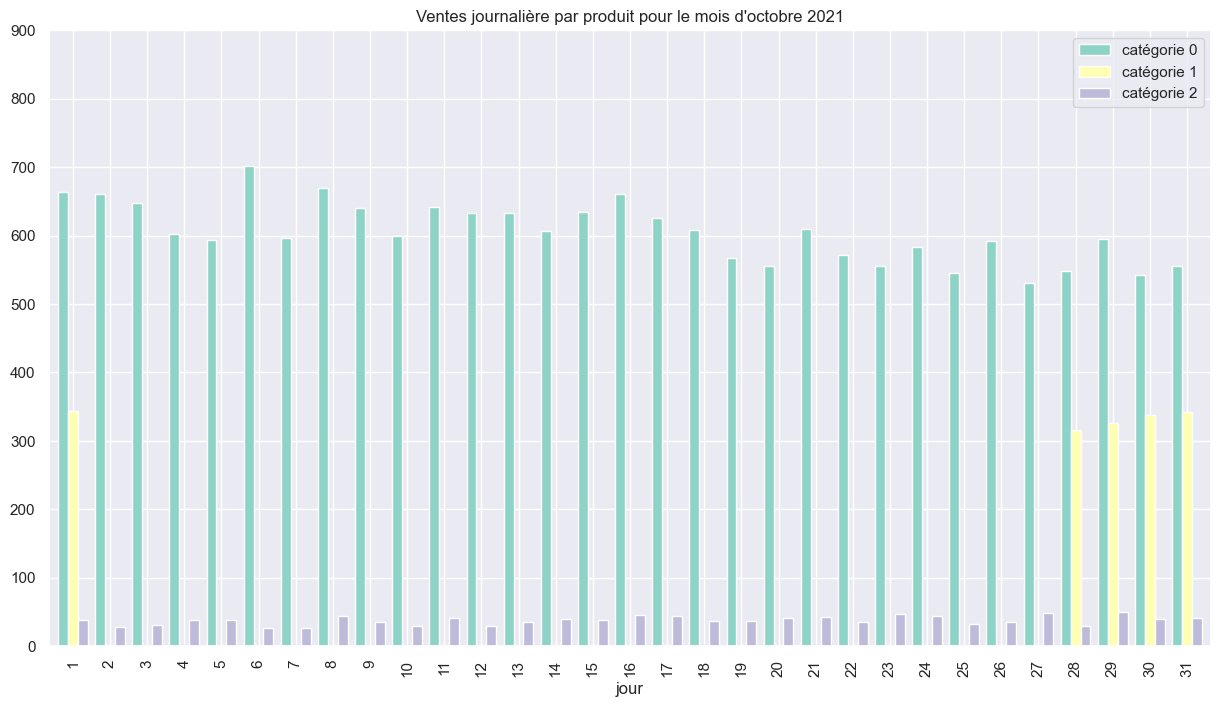

In [59]:
# Etude des ventes de catégorie 1

CA_oct21 = CA_oct21.assign(new_col=1) # Nouvelle colonne créée pour compter les transactions d'octobre 21

transac0= CA_oct21.loc[CA_oct21['categ'] == 0] 
transac1= CA_oct21.loc[CA_oct21['categ'] == 1] 
transac2= CA_oct21.loc[CA_oct21['categ'] == 2] 

transac0 = transac0.groupby('jour')['new_col'].sum().reset_index() # comptage des transactions grâce au groupby
transac1 = transac1.groupby('jour')['new_col'].sum().reset_index()
transac2 = transac2.groupby('jour')['new_col'].sum().reset_index()

transac = pd.merge(transac0, transac1, on = 'jour', how = 'left')
transac = transac.rename(columns={'new_col_x' : 'transac0', 'new_col_y' : 'transac1'})
transac['transac1'] = transac['transac1'].fillna(0) # remplissage des nan par la valeur 0
transac['transac1'] = transac['transac1'].astype('int64')
transac = pd.merge(transac, transac2, on = 'jour', how = 'left')
transac = transac.rename(columns={'new_col' : 'transac2'})


transac.plot(kind='bar', x='jour', y=['transac0', 'transac1', 'transac2'], figsize = (15,8), width = 0.8)
plt.title("Ventes journalière par produit pour le mois d'octobre 2021")
plt.ylim(0, 900)
plt.legend(['catégorie 0', 'catégorie 1', 'catégorie 2'], loc = 'upper right')

plt.show()


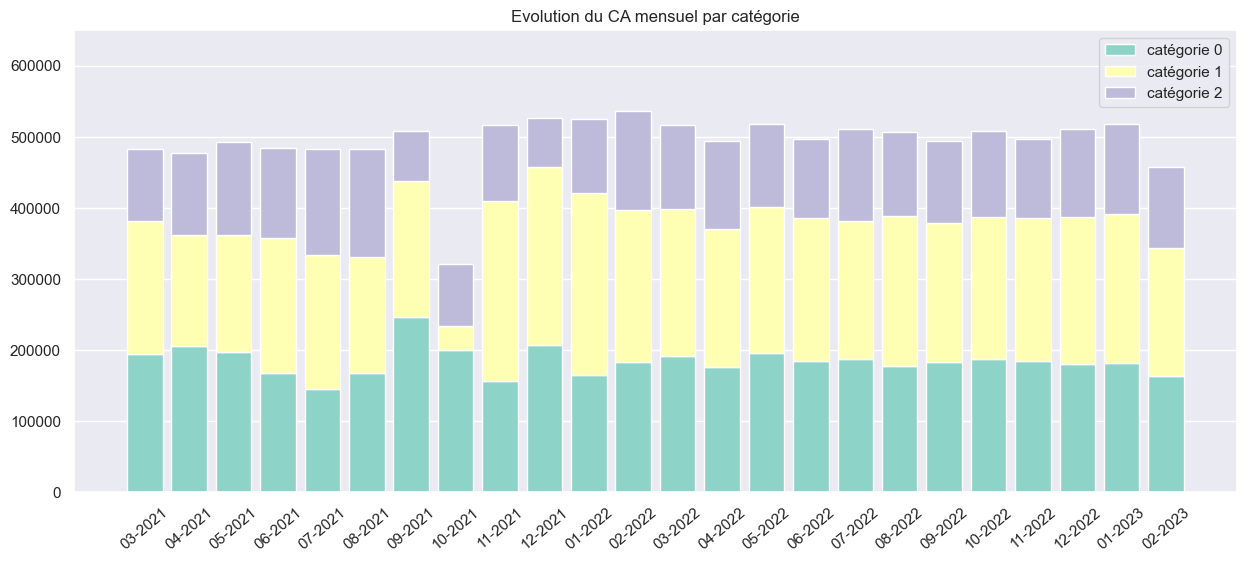

In [60]:
# CA par catégorie par mois

# Regroupement des données de CA par années, mois et catégorie

CA_mois = data.groupby(['année', 'mois', 'categ']) ['price'].sum()
CA_mois = CA_mois.reset_index()
CA_mois.sort_values(['année', 'mois'])
CA_mois = CA_mois.rename(columns = {'price' : 'CA_mensuel'})

# Modification du type

CA_mois['année'] = CA_mois['année'].astype('object')
CA_mois['mois'] = CA_mois['mois'].astype('object')

# Création d'une nouvelle colonne avec le format date MM-YYYY

CA_mois['date'] = CA_mois.apply(lambda x: "0{}-{}".format(x['mois'],x['année']) 
                    if x['mois'] < 10 else "{}-{}".format(x['mois'],x['année']), 
                    axis=1)

# les CA de chaque catégorie sont isolés dans un aray

categ_0 = CA_mois.loc[CA_mois['categ'] == 0, 'CA_mensuel']
categ_1 = CA_mois.loc[CA_mois['categ'] == 1, 'CA_mensuel']
categ_2 = CA_mois.loc[CA_mois['categ'] == 2, 'CA_mensuel']

date = CA_mois['date']
date = date.drop_duplicates()
date = date.reset_index(drop = 'true')

# Construction du barplot

plt.figure(figsize = (15, 6))
plt.bar(date, categ_0)
plt.bar(date, categ_1, bottom = categ_0)
plt.bar(date, categ_2, bottom = np.array(categ_0) + np.array(categ_1))
plt.grid(axis = 'x')
plt.xticks(rotation = 40)
plt.legend(['catégorie 0', 'catégorie 1', 'catégorie 2'], loc = 'upper right')
plt.ylim(0, 650000)
plt.title("Evolution du CA mensuel par catégorie")

plt.show()

In [61]:
# CA par catégorie selon le jour de semaine

CA_jour = data.groupby(['jour_semaine', 'categ'])['price'].sum()
CA_jour = CA_jour.unstack(level = 1)
week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
CA_jour = CA_jour.reindex(week)
CA_jour = CA_jour.reset_index()

CA_jour

categ,jour_semaine,0,1,2
0,Monday,635751.27,665384.01,413539.16
1,Tuesday,640268.83,677580.56,394246.10
2,Wednesday,636834.81,665947.99,384355.17
3,Thursday,626324.45,665628.12,401054.63
4,Friday,623558.37,660368.46,401062.62
5,Saturday,623182.65,657527.82,395314.21
6,Sunday,637667.04,661285.73,390703.13


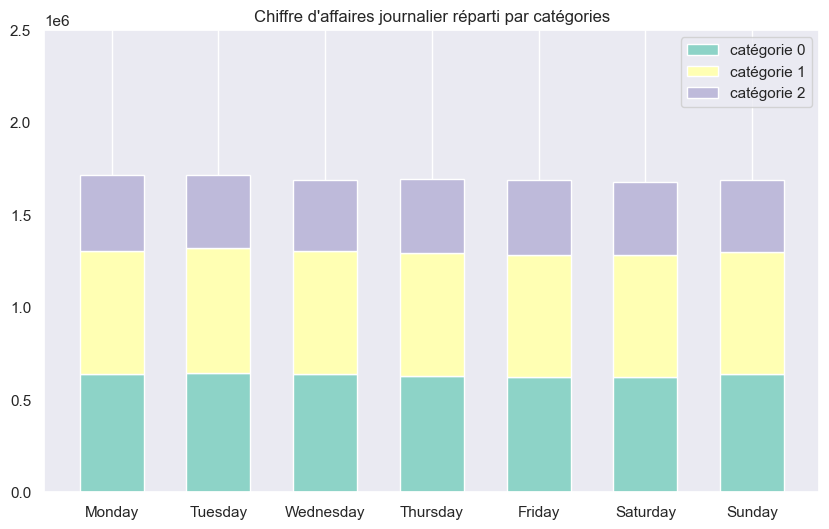

In [62]:
# Graphique CA réparti par catégorie et jour de semaine

categ_0 = CA_jour.loc[:, 0]
categ_1 = CA_jour.loc[:, 1]
categ_2 = CA_jour.loc[:, 2]

jour = CA_jour['jour_semaine']

plt.figure(figsize = (10,6))
plt.bar(jour, categ_0, label = 'catégorie 0', width = 0.6)
plt.bar(jour, categ_1, bottom = categ_0, label = 'catégorie 1',  width = 0.6)
plt.bar(jour, categ_2, bottom = np.array(categ_0) + np.array(categ_1), label = 'catégorie 2',  width = 0.6)
plt.title("Chiffre d'affaires journalier réparti par catégories")
plt.ylim(0, 2500000)
plt.legend()
plt.grid(axis = 'y')

plt.show()

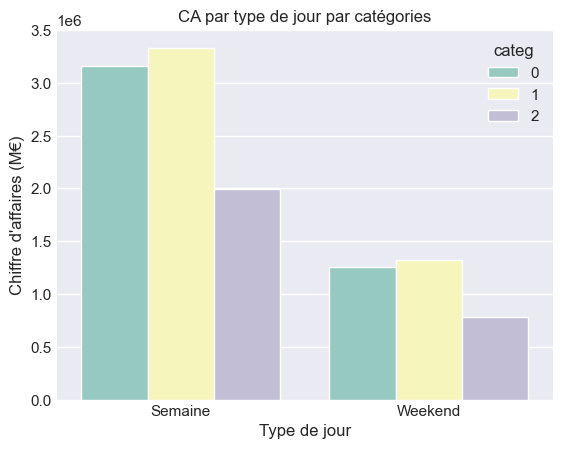

In [63]:
# CA par type de jour par catégories

CA_semaine = data.groupby(['type_jour', 'categ'])['price'].sum().reset_index()

plt.style.use('seaborn-darkgrid')
sns.barplot(data = CA_semaine, x = 'type_jour', y = 'price', hue = 'categ')
plt.xlabel("Type de jour")
plt.ylabel("Chiffre d'affaires (M€)")
plt.title("CA par type de jour par catégories")

plt.show()

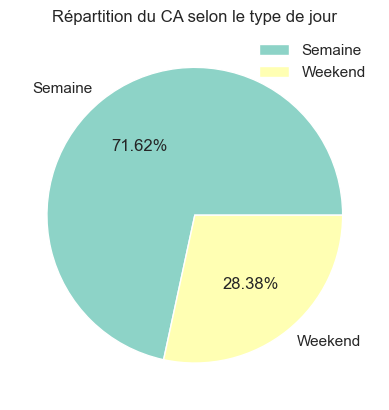

In [64]:
# CA par type de jour

CA_semaine = data.groupby(['type_jour'])['price'].sum().reset_index()
plt.pie(x = CA_semaine['price'], labels = CA_semaine['type_jour'], autopct = '%.2f%%')
plt.title("Répartition du CA selon le type de jour")
plt.legend()

plt.show()

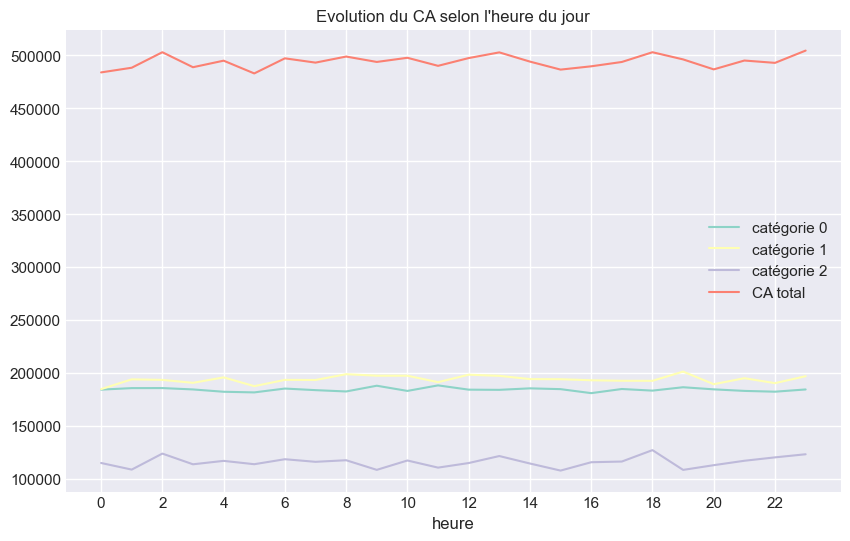

In [65]:
# CA par moment de la journée

CA_heure = data.groupby(['heure', 'categ'])['price'].sum()
CA_heure = CA_heure.unstack(level = 1)
CA_heure ['CA total']= CA_heure[0] + CA_heure[1] + CA_heure[2] 


CA_heure.plot(kind = 'line', figsize=(10,6), subplots=False)
plt.legend(['catégorie 0', 'catégorie 1', 'catégorie 2', 'CA total'])
plt.xticks(range(0, 23, 2))
plt.title("Evolution du CA selon l'heure du jour")

plt.show()

### Etude des top ventes et CA

In [66]:
# Etude des produits ayant rapporté le plus de CA

from IPython.display import display

top_CA = data.groupby('id_prod')['price'].sum().reset_index().sort_values('price', ascending = False)
top_CA = top_CA.rename(columns = {'price' : 'CA'})
top_CA = pd.merge(top_CA, products, on = 'id_prod', how = 'left')
top_CA.loc[top_CA['id_prod'] == '0_2245', 'categ'] =  0
top_CA.loc[top_CA['id_prod'] == '0_2245', 'price'] =  17.45
top_CA['total_ventes'] = top_CA['CA'] / top_CA['price']
top_CA['total_ventes'] = top_CA['total_ventes'].astype('int64')
top_CA['categ'] = top_CA['categ'].astype('int64')

top_CA2 = top_CA.sort_values('total_ventes', ascending = False).reset_index(drop = True)

from IPython.core.display import HTML
HTML(f'<table><tr><td>{top_CA.to_html()}</td><td>{top_CA2.to_html()}</td></tr></table>')

,id_prod,CA,price,categ,total_ventes
0,2_159,94893.50,145.99,2,650
1,2_135,69334.95,68.99,2,1005
2,2_112,65407.76,67.57,2,968
3,2_102,60736.78,59.14,2,1027
4,2_209,56971.86,69.99,2,814
5,1_395,54356.25,28.99,1,1875
6,1_369,54025.48,23.99,1,2252
7,2_110,53846.25,62.25,2,865
8,2_39,53060.85,57.99,2,915
9,2_166,52449.12,230.04,2,228


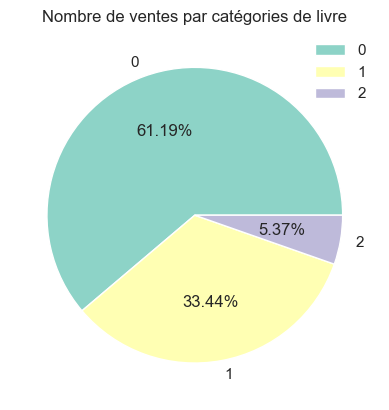

In [67]:
# Nombre total de ventes réparties par catégories livres

top_CA = top_CA.groupby('categ')['total_ventes'].sum()
top_CA = top_CA.reset_index()

plt.pie(x=top_CA['total_ventes'], labels=top_CA['categ'], autopct= '%.2f%%')
plt.title("Nombre de ventes par catégories de livre")
plt.legend(loc = 'upper right')

plt.show()


### Etude des flop ventes et CA
Nous avons environ 3000 références de livres pour un CA de 11.8M€. Avec une juste répartition chaque référence rapport environ 4K€. Nous choisissons d'étudier les flop pour les références rapportant moins de 500€.

De même il y a eu 679 000 ventes soit théoriquement environ 225 ventes par référence. Nous considérons comme flop les références ayant été vendues à mois de 20 exemplaires.

Ces éléments seront à nuancer avec l'étude suivante :

In [68]:
top_CA = data.groupby('id_prod')['price'].sum().reset_index().sort_values('price', ascending = False)
top_CA = top_CA.rename(columns = {'price' : 'CA'})
top_CA = pd.merge(top_CA, products, on = 'id_prod', how = 'left')
top_CA.loc[top_CA['id_prod'] == '0_2245', 'categ'] =  0
top_CA.loc[top_CA['id_prod'] == '0_2245', 'price'] =  17.45
top_CA['total_ventes'] = top_CA['CA'] / top_CA['price']
top_CA['total_ventes'] = top_CA['total_ventes'].astype('int64')
top_CA['categ'] = top_CA['categ'].astype('int64')


# Ventes <= à 20 exemplaires
flop_ventes = top_CA.loc[top_CA['total_ventes'] <= 20].sort_values('CA', ascending = False)

# CA <= à 500€
flop_CA = top_CA.loc[top_CA['CA'] <= 500].sort_values('CA', ascending = False)

# CA <= à 500€ et ventes <= à 20 exemplaires
flop = top_CA.loc[(top_CA['CA'] <= 500) & (top_CA['total_ventes'] <= 20)].sort_values('CA', ascending = False)

print("flop : CA <= à 500€ et ventes <= à 20 exemplaires")
print("CA total de cette catégorie :", round(flop['CA'].sum()/1000),"k€")
display(flop)
print("flop_CA : CA <= à 500€ ")
print("CA total de cette catégorie :", round(flop_CA['CA'].sum()/1000),"k€")
display(flop_CA)
print("flop_ventes : Ventes <= à 20 exemplaires")
print("CA total de cette catégorie :", round(flop_ventes['CA'].sum()/1000),"k€")
display(flop_ventes)

flop : CA <= à 500€ et ventes <= à 20 exemplaires
CA total de cette catégorie : 126 k€


,id_prod,CA,price,categ,total_ventes
1926,0_2121,499.80,24.99,0,20
1933,1_349,494.85,32.99,1,15
1938,1_138,491.37,44.67,1,11
1939,0_1749,489.86,34.99,0,14
1947,2_24,484.40,96.88,2,5
...,...,...,...,...,...
3261,0_1601,1.99,1.99,0,1
3262,0_807,1.99,1.99,0,1
3263,0_1653,1.98,0.99,0,2
3264,0_1284,1.38,1.38,0,1


flop_CA : CA <= à 500€ 
CA total de cette catégorie : 267 k€


,id_prod,CA,price,categ,total_ventes
1926,0_2121,499.80,24.99,0,20
1927,0_136,499.13,13.49,0,37
1928,0_582,498.12,11.86,0,42
1929,0_454,498.05,14.23,0,35
1930,0_2162,496.92,3.03,0,164
...,...,...,...,...,...
3261,0_1601,1.99,1.99,0,1
3262,0_807,1.99,1.99,0,1
3263,0_1653,1.98,0.99,0,2
3264,0_1284,1.38,1.38,0,1


flop_ventes : Ventes <= à 20 exemplaires
CA total de cette catégorie : 259 k€


,id_prod,CA,price,categ,total_ventes
656,2_2,4500.00,300.00,2,15
889,2_50,3013.80,150.69,2,20
954,2_5,2687.86,191.99,2,14
968,2_11,2625.87,201.99,2,12
1005,2_57,2488.81,130.99,2,19
...,...,...,...,...,...
3261,0_1601,1.99,1.99,0,1
3262,0_807,1.99,1.99,0,1
3263,0_1653,1.98,0.99,0,2
3264,0_1284,1.38,1.38,0,1


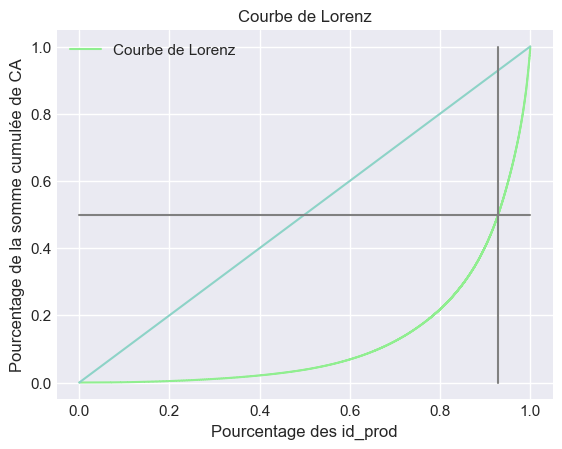

In [69]:
# Courbe de lorenz suivant les variables id_prod et CA

top_CA = top_CA.sort_values('CA')
top_CA['CA_cumulé'] = top_CA['CA'].cumsum()
top_CA['% CA cumulé'] = top_CA['CA_cumulé'] / top_CA['CA'].sum()
top_CA['% pop cumulée'] = (np.arange(top_CA.shape[0]) + 1) / top_CA.shape[0]

médiale = 0.928965
x = [0, 1]
y = [0, 1]


plt.plot(top_CA['% pop cumulée'], top_CA['% CA cumulé'], drawstyle = 'steps-post', label = "Courbe de Lorenz", color = 'lightgreen')
plt.plot(x, y)
plt.plot(x, [0.5, 0.5], color = 'grey')
plt.plot([médiale, médiale], y, color = 'grey')
plt.title('Courbe de Lorenz')
plt.xlabel('Pourcentage des id_prod')
plt.ylabel('Pourcentage de la somme cumulée de CA')
plt.legend()

plt.show()

# 3ème partie : Analyse des profils clients

In [70]:
data

,id_prod,date,session_id,client_id,année,mois,jour,heure,jour_semaine,type_jour,price,categ,sex,birth,age,tranche d'age
0,0_1518,2022-05-20,s_211425,c_103,2022,5,20,13,Friday,Semaine,4.18,0,f,1986,36,26-40
1,0_1518,2021-07-20,s_64849,c_103,2021,7,20,13,Tuesday,Semaine,4.18,0,f,1986,36,26-40
2,0_1518,2022-08-20,s_255965,c_103,2022,8,20,13,Saturday,Weekend,4.18,0,f,1986,36,26-40
3,0_1418,2022-06-18,s_225411,c_103,2022,6,18,1,Saturday,Weekend,8.57,0,f,1986,36,26-40
4,0_1418,2021-08-18,s_77214,c_103,2021,8,18,1,Wednesday,Semaine,8.57,0,f,1986,36,26-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23,s_65994,c_4391,2021,7,23,7,Friday,Semaine,181.99,2,f,2001,21,18-25
679328,0_142,2022-03-25,s_184472,c_1232,2022,3,25,18,Friday,Semaine,19.85,0,f,1960,62,55-70
679329,0_142,2021-09-25,s_95415,c_1232,2021,9,25,18,Saturday,Weekend,19.85,0,f,1960,62,55-70
679330,2_205,2021-03-11,s_4605,c_7534,2021,3,11,0,Thursday,Semaine,100.99,2,m,1992,30,26-40


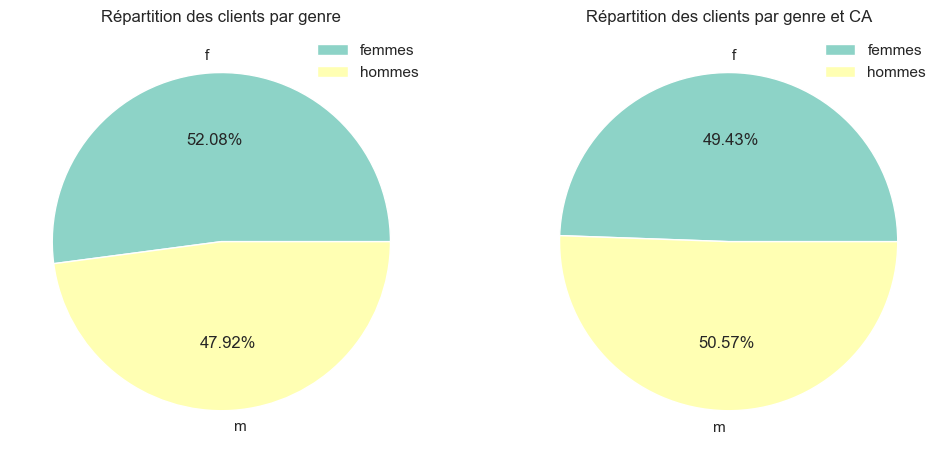

In [71]:
# Répartition des clients par genre

genre = data.groupby(['client_id', 'sex']).sum(numeric_only=True).reset_index()
genre = genre.assign(new_col = 1)
genre = genre.groupby('sex')['new_col'].sum().reset_index()
genre2 = data.groupby('sex')['price'].sum().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.pie(x = 'new_col', labels = 'sex', data = genre, autopct='%.2f%%')
ax1.set_title("Répartition des clients par genre")
ax1.legend(['femmes', 'hommes'], loc = 'upper right')

ax2.pie(x= 'price', labels='sex', data = genre2, autopct='%.2f%%')
ax2.set_title("Répartition des clients par genre et CA")
ax2.legend(['femmes', 'hommes'], loc = 'upper right')

plt.show()

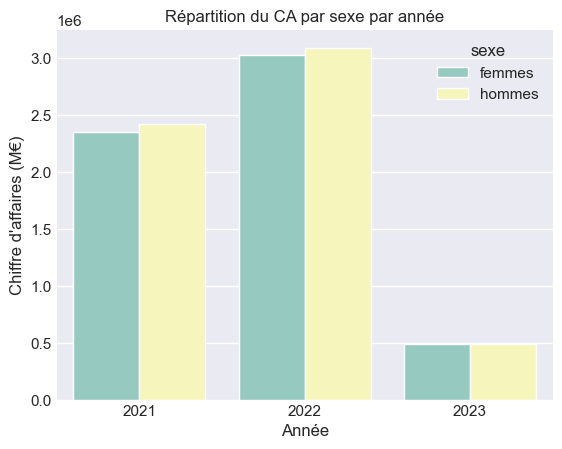

In [72]:
# Répartition du CA par sexe

sns.barplot(data=data, x='année', y='price', ci=None, hue='sex', estimator=sum)
plt.title("Répartition du CA par sexe par année")
plt.xlabel("Année")
plt.ylabel("Chiffre d'affaires (M€)")
plt.legend(title='sexe', labels=['femmes', 'hommes'])

plt.show()


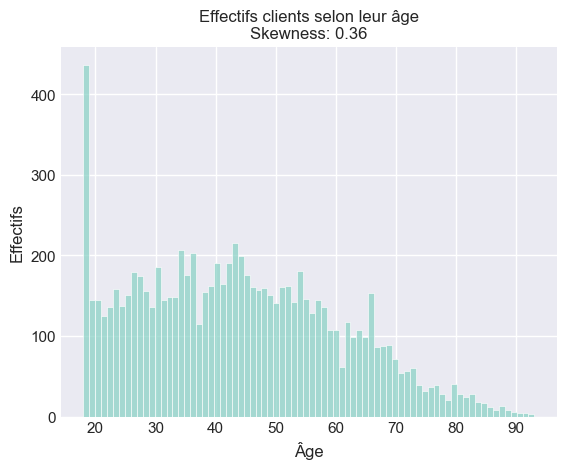

In [73]:
# Répartition des âges

ages = data.drop_duplicates('client_id')
skewness = ages['age'].skew()

sns.histplot(ages['age'], bins = 76)
plt.title("Effectifs clients selon leur âge\nSkewness: {:.2f}".format(skewness))
plt.xlabel("Âge")
plt.ylabel("Effectifs")

plt.show()

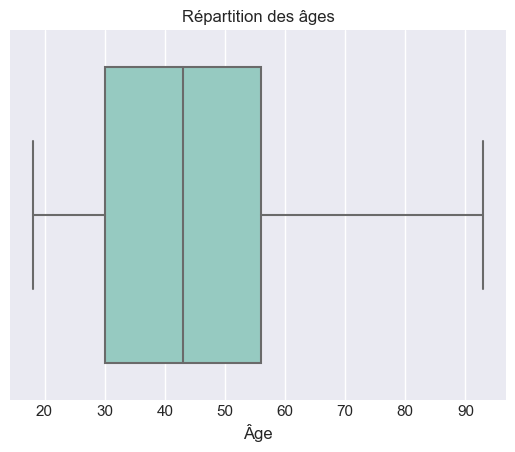

In [74]:
# Répartition des âges

sns.boxplot(x = ages['age'])
plt.title('Répartition des âges')
plt.xlabel('Âge')

plt.show()

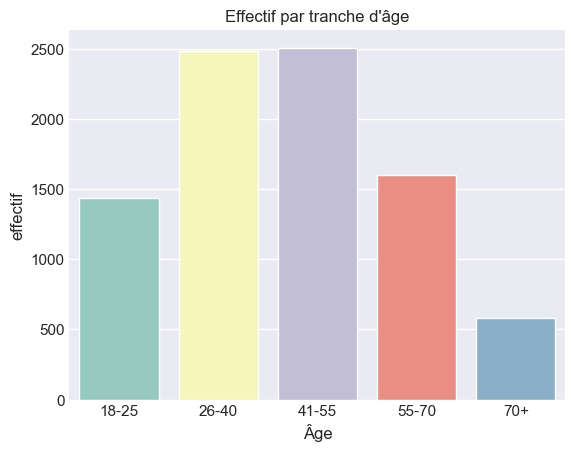

In [75]:
# Effectif par tranche d'âge

tranche = data.groupby("tranche d'age")['client_id'].nunique().reset_index()

sns.barplot(x = "tranche d'age", y = 'client_id', data = tranche, )
plt.title("Effectif par tranche d'âge")
plt.xlabel('Âge')
plt.ylabel('effectif')


plt.show()

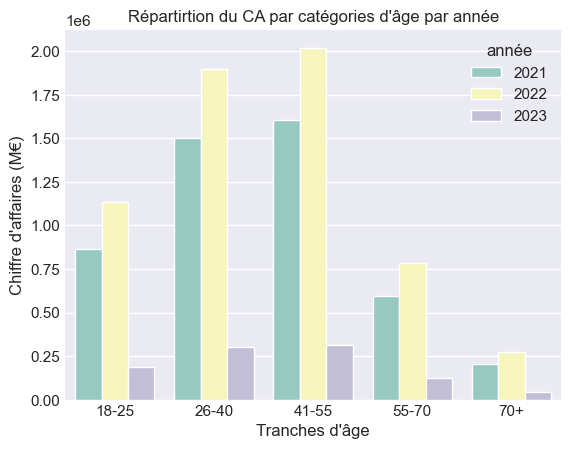

In [76]:
# Répartirtion du CA par catégorie d'âges

data = data.sort_values('age')
sns.barplot(data=data, x="tranche d'age", y='price', ci=None, hue='année', estimator=sum)
plt.title("Répartirtion du CA par catégories d'âge par année")
plt.xlabel("Tranches d'âge")
plt.ylabel("Chiffre d'affaires (M€)")

plt.show()

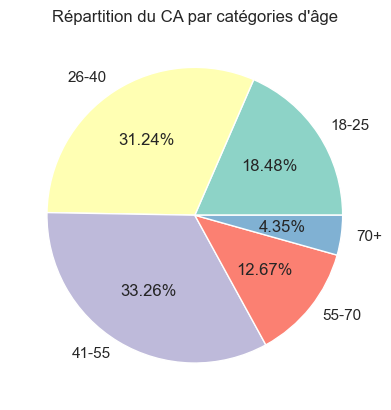

In [77]:
# Répartition du CA par catégories d'âge

CA_age = data.groupby("tranche d'age")['price'].sum().reset_index()

plt.pie(x = CA_age['price'], labels = CA_age["tranche d'age"], autopct='%2.2f%%')
plt.title("Répartition du CA par catégories d'âge")

plt.show()

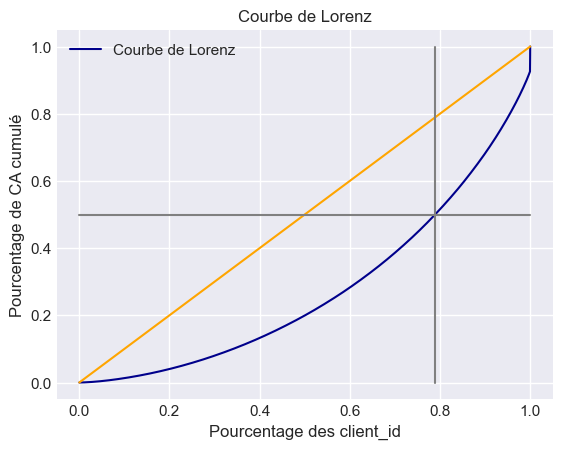

In [78]:
# Répartition du CA entre les clients

ca_client = data.groupby('client_id')['price'].sum().reset_index().sort_values('price')
ca_client = ca_client.rename(columns = {'price' : 'CA client'})
ca_client['% client cumulé'] = (np.arange(ca_client.shape[0]) + 1) / ca_client.shape[0]
ca_client ['CA cumulé'] = ca_client['CA client'].cumsum()
ca_client ['% CA cumulé'] = ca_client['CA cumulé']/ ca_client['CA client'].sum()

médiale = 0.789186
x = [0, 1]
y = [0, 1]

# Construction d'une courbe de Lorenz

plt.plot(ca_client['% client cumulé'], ca_client['% CA cumulé'], label = "Courbe de Lorenz", color = 'darkblue')
plt.plot(x, y, color = 'orange')
plt.plot(x, [0.5, 0.5], color = 'grey')
plt.plot([médiale, médiale], y, color = 'grey')
plt.title('Courbe de Lorenz')
plt.xlabel('Pourcentage des client_id')
plt.ylabel('Pourcentage de CA cumulé')
plt.legend()

plt.show()

# 4ème partie : Etude des corrélations clients / produits

In [79]:
data

,id_prod,date,session_id,client_id,année,mois,jour,heure,jour_semaine,type_jour,price,categ,sex,birth,age,tranche d'age
636477,0_1432,2021-03-30,s_13430,c_5846,2021,3,30,7,Tuesday,Semaine,15.36,0,f,2004,18,18-25
340011,2_175,2022-01-10,s_147584,c_7712,2022,1,10,3,Monday,Semaine,60.99,2,f,2004,18,18-25
340012,1_308,2021-12-20,s_136984,c_7712,2021,12,20,0,Monday,Semaine,11.65,1,f,2004,18,18-25
340013,1_308,2022-04-20,s_196604,c_7712,2022,4,20,0,Wednesday,Semaine,11.65,1,f,2004,18,18-25
340014,1_441,2022-11-16,s_298249,c_7712,2022,11,16,6,Wednesday,Semaine,24.99,1,f,2004,18,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626183,1_245,2022-09-02,s_262225,c_8362,2022,9,2,14,Friday,Semaine,23.99,1,f,1929,93,70+
626184,1_245,2022-10-02,s_276735,c_8362,2022,10,2,14,Sunday,Weekend,23.99,1,f,1929,93,70+
626185,1_245,2022-12-02,s_306083,c_8362,2022,12,2,14,Friday,Semaine,23.99,1,f,1929,93,70+
356047,1_686,2022-02-02,s_158724,c_577,2022,2,2,6,Wednesday,Semaine,24.03,1,m,1929,93,70+


In [114]:
# Corrélation entre le genre d'un client et la catégorie de livre achetée

# Tableau de contingence
Y = "sex"
X = "categ"
cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

cont

sex,f,m,Total
categ,,,
0,206220,209460,415680
1,114899,112270,227169
2,17283,19200,36483
Total,338402,340930,679332


In [122]:
# Test d'indépendance du chi-2

# H0 = Les variables sont indépendantes
# H1 = Les variables ne sont pas indépendantes

ct = pd.crosstab(data["sex"], data["categ"])

from scipy.stats import chi2_contingency
chi2_contingency(ct)[1]


1.1989607410166063e-32

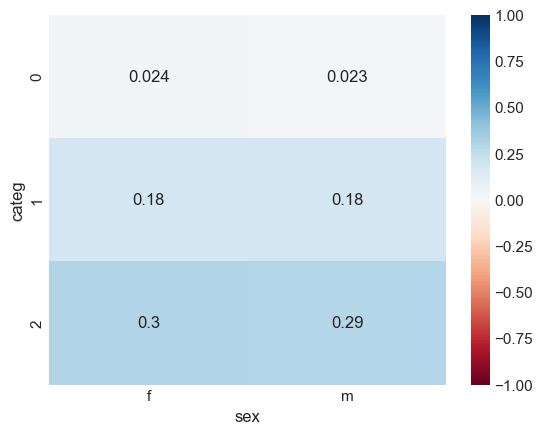

In [115]:
# Heatmap

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.show()


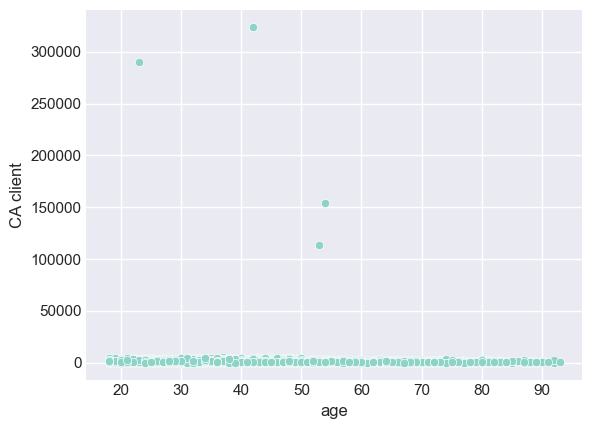

In [82]:
# Corrélation entre l'âge des clients et montant des achats

ageXachat = data.groupby('client_id')['price'].sum().reset_index()
ageXachat = ageXachat.rename(columns = {'price' : 'CA client'})
ageXachat = pd.merge(ageXachat, customers, on = 'client_id', how = 'left')

# Construction du diagramme de dispersion

sns.scatterplot ( x = 'age', y = 'CA client', data = ageXachat)

plt.show()


In [83]:
# Isolons les 4 clients dont les montants d'achats sont les plus élevés

ageXachat[ageXachat['CA client'] >100000].sort_values('CA client')

,client_id,CA client,sex,birth,age,tranche d'age
2724,c_3454,113690.28,m,1969,53,41-55
6337,c_6714,153703.62,f,1968,54,41-55
4388,c_4958,289760.34,m,1999,23,18-25
677,c_1609,324033.35,m,1980,42,41-55


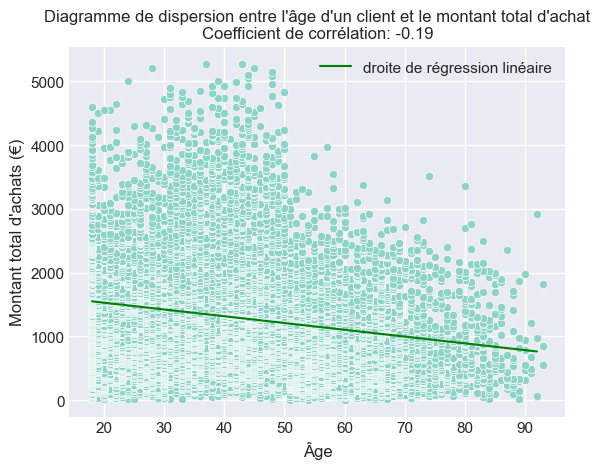

In [84]:
# Correction du diagramme de dispersion

ageXachat = ageXachat[ageXachat['CA client'] < 100000]
ageXachat = ageXachat.sort_values('CA client')


sns.scatterplot ( x = 'age', y = 'CA client', data = ageXachat)

# Coefficient de corrélation

import scipy.stats as st
corrélation = st.pearsonr(ageXachat['age'], ageXachat['CA client'])[0]

# construction de la droite de régression linéaire

import statsmodels.api as sm
Y = ageXachat['CA client']
X = ageXachat[['age']]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params['age'], result.params['intercept']
plt.plot(np.arange(18, 93),[a*x+b for x in np.arange(18, 93)], color = 'green', label = 'droite de régression linéaire')
plt.legend()
plt.title("Diagramme de dispersion entre l'âge d'un client et le montant total d'achat\nCoefficient de corrélation: {:.2f}".format(corrélation) )
plt.xlabel("Âge")
plt.ylabel("Montant total d'achats (€)")

plt.show()


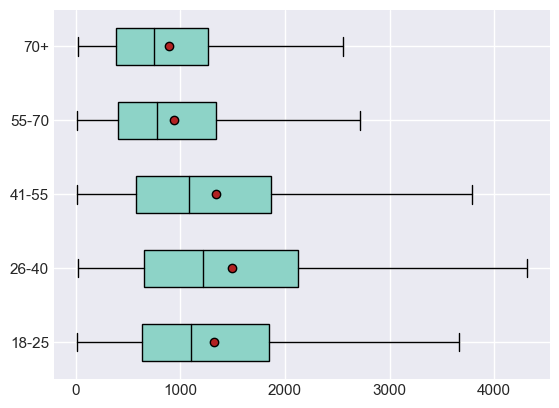

In [85]:
# Etude de la corrélation âge/achats en se basant sur la tranche d'âge
ageXachat = ageXachat.sort_values('age')

X = "tranche d'age"
Y = "CA client"

sous_echantillon = ageXachat.loc[ageXachat["CA client"]>0, :].copy()

modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

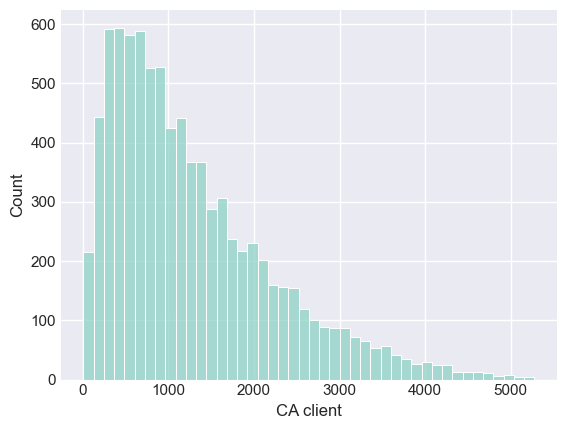

In [175]:
# Vérification graphique de la distribution de la variable CA client

sns.histplot(ageXachat['CA client'])
plt.show()

In [159]:
# Test de Shapiro-Wilk

import scipy.stats
from scipy.stats import ks_2samp
scipy.stats.shapiro(ageXachat["CA client"])

ShapiroResult(statistic=0.9036639928817749, pvalue=0.0)

In [182]:
# Test d'égalité des variances

from scipy.stats import bartlett

group1 = ageXachat[ageXachat["tranche d'age"] == '18-25']['CA client']
group2 = ageXachat[ageXachat["tranche d'age"] == '26-40']['CA client']
group3 = ageXachat[ageXachat["tranche d'age"] == '41-55']['CA client']
group4 = ageXachat[ageXachat["tranche d'age"] == '55-70']['CA client']
group5 = ageXachat[ageXachat["tranche d'age"] == '70+']['CA client']

bartlett(group1, group2, group3, group4, group5)

BartlettResult(statistic=504.2994057830342, pvalue=7.873228260527126e-108)

In [181]:
# Test de Kruskal-Wallis

# H0 = Il n'y a pas de différence significative entre la moyenne des 2 variables
# H1 = Il y a une différence significative entre la moyenne des 2 variables

import scipy.stats as stats

stat, p = stats.kruskal(group1, group2, group3, group4, group5)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=174.787, p=0.000


Avec une p-value de 0 nous pouvons affirmer que la catégorie d'âge a un significatif impact sur le chiffre d'affaires réalisé.

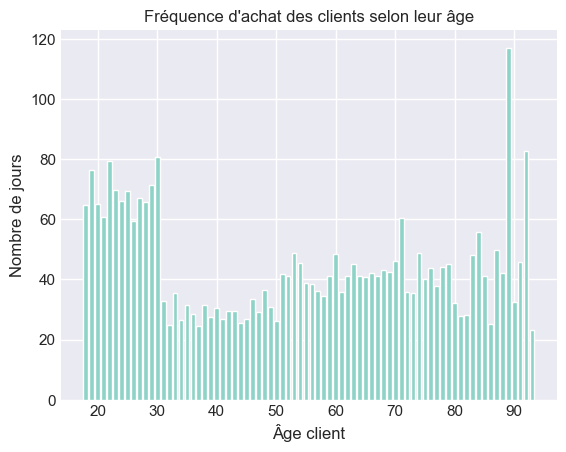

In [86]:
# Calcul des fréquences d'achats des clients

freq = data.groupby('client_id')['date'].nunique().reset_index()
freq["fréquence d'achat (jour)"] =  round(len(data['date'].unique()) / freq['date'], 1)

freq = pd.merge(freq, customers, on = 'client_id', how = 'left')
freq = freq.groupby('age')["fréquence d'achat (jour)"].mean().reset_index()

plt.bar(freq['age'], freq["fréquence d'achat (jour)"])
plt.title ("Fréquence d'achat des clients selon leur âge")
plt.xlabel('Âge client')
plt.ylabel('Nombre de jours')

plt.show()

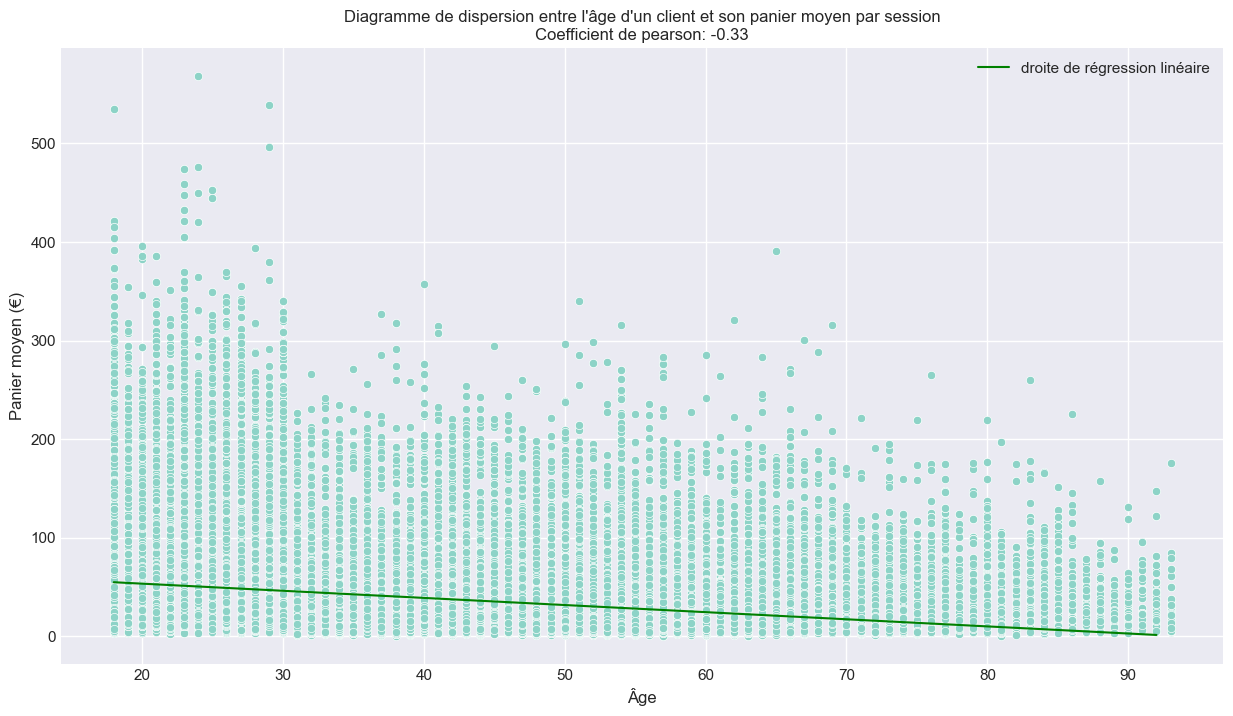

In [112]:
# Corrélation entre l'âge d'un client et son panier moyen par session

ageXpanier = data.groupby('session_id')['price'].sum().reset_index()
ageXpanier = ageXpanier.merge(data[['session_id', 'age']], on='session_id', how='left')
ageXpanier = ageXpanier.drop_duplicates(subset = 'session_id')
ageXpanier = ageXpanier.rename(columns = {'price' : 'panier moyen'})

# Scatterplot

plt.figure(figsize = (15, 8))
sns.scatterplot(data = ageXpanier,  x = 'age', y = 'panier moyen')

# Coefficient de corrélation

import scipy.stats as st
corrélation = st.pearsonr(ageXpanier['age'], ageXpanier['panier moyen'])[0]

# construction de la droite de régression linéaire

import statsmodels.api as sm
Y = ageXpanier['panier moyen']
X = ageXpanier[['age']]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params['age'], result.params['intercept']
plt.plot(np.arange(18, 93),[a*x+b for x in np.arange(18, 93)], color = 'green', label = 'droite de régression linéaire')
plt.legend()
plt.title("Diagramme de dispersion entre l'âge d'un client et son panier moyen par session\nCoefficient de pearson: {:.2f}".format(corrélation) )
plt.xlabel("Âge")
plt.ylabel("Panier moyen (€)")

plt.show()

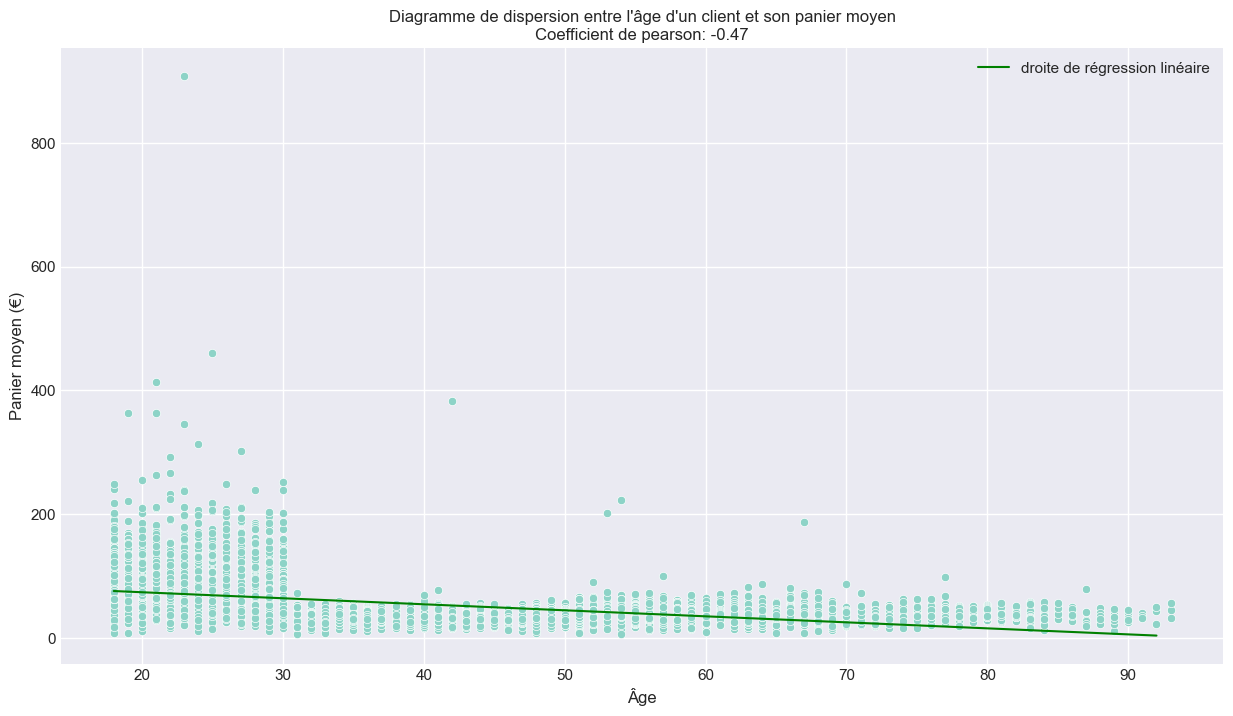

In [108]:
# Corrélation entre l'âge d'un client et son panier moyen

panier = data.groupby('client_id')['price'].sum().reset_index()
panier = panier.merge(data[['client_id', 'age']], on='client_id', how='left')
panier = panier.drop_duplicates(subset = 'client_id')
achats = data.groupby('client_id')['price'].nunique().reset_index()
achats = achats.rename(columns = {'price' : 'nb achats'})
panier = panier.merge(achats, on = 'client_id', how = 'left')
panier = panier.rename(columns = {'price' : 'panier moyen'})
panier ['panier moyen'] =  round(panier ['panier moyen'] / panier ['nb achats'], 2)

# Scatterplot

plt.figure(figsize = (15, 8))
sns.scatterplot(data = panier,  x = 'age', y = 'panier moyen')

# Coefficient de corrélation

import scipy.stats as st
corrélation = st.pearsonr(panier['age'], panier['panier moyen'])[0]

# construction de la droite de régression linéaire

import statsmodels.api as sm
Y = panier['panier moyen']
X = panier[['age']]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params['age'], result.params['intercept']
plt.plot(np.arange(18, 93),[a*x+b for x in np.arange(18, 93)], color = 'green', label = 'droite de régression linéaire')
plt.legend()
plt.title("Diagramme de dispersion entre l'âge d'un client et son panier moyen\nCoefficient de pearson: {:.2f}".format(corrélation) )
plt.xlabel("Âge")
plt.ylabel("Panier moyen (€)")

plt.show()

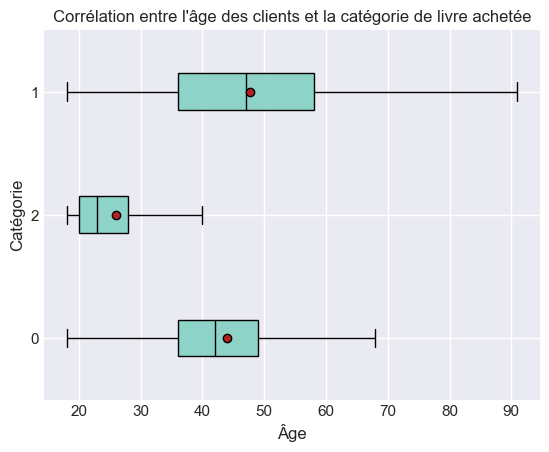

In [103]:
# Corrélation entre l'âge et la catégorie achetée

Y = "age"
X = "categ"

sous_echantillon = data.loc[data["age"]>0, :].copy()

modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Corrélation entre l'âge des clients et la catégorie de livre achetée")
plt.xlabel('Âge')
plt.ylabel('Catégorie')

plt.show()

In [126]:
# Test de shapiro-Wilk de vérification de la normalité de la variable age

import scipy.stats
from scipy.stats import ks_2samp
scipy.stats.shapiro(data["age"])

ShapiroResult(statistic=0.9734767079353333, pvalue=0.0)

La variable 'age' est donc significativement différente de la distribution normale.

In [154]:
# Test de variance
# H0 = Les variances sont supposées égales
# H1 = Les variances sont différentes

from scipy.stats import bartlett

group1 = data[data['categ'] == 0]['age']
group2 = data[data['categ'] == 1]['age']
group3 = data[data['categ'] == 2]['age']

bartlett(group1, group2, group3)

BartlettResult(statistic=36719.894446044455, pvalue=0.0)

In [158]:
# Test de Wilcoxon

# H0 = Il n'y a pas de différence significative entre la moyenne des 2 variables
# H1 = Il y a une différence significative entre la moyenne des 2 variables

group1 = group1.head(36483)
group2 = group2.head(36483)

import scipy.stats as stats

stat, p = stats.wilcoxon(group1, group2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = stats.wilcoxon(group1, group3)
print('Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = stats.wilcoxon(group2, group3)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.000, p=0.000
Statistics=90494056.000, p=0.000
Statistics=67682235.000, p=0.000


Les p-value sont égales à 0 ce qui signifie que l'âge a un réel impact sur la catégorie de livre achetée